In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

Load and merge data with manually labeled articles:

In [2]:
data1 = pd.read_excel('SB_validation_data/Data2Sclassify_Seba.xlsx')
data2 = pd.read_excel('SB_validation_data/Data2Sclassify_Pablo.xlsx')
#data3 = pd.read_excel('SB_validation_data/Data2Sclassify_Sofi.xlsx')

In [3]:
all_data = data1.merge(data2[['id', 'Posicion CL','Posicion CR']], on = 'id')
#all_data = all_data.merge(data3[['id', 'Posicion CL','Posicion CR']], on = 'id')

Define an overeal Sentiment manually labeled as the mean of the classification of the labelers:

In [4]:
all_data['SCL_labeled'] = all_data[[c for c in all_data.columns if 'Posicion CL' in c]].mean(axis = 1)
all_data['SCR_labeled'] = all_data[[c for c in all_data.columns if 'Posicion CR' in c]].mean(axis = 1)

Retain only useful information:

In [5]:
all_data = all_data[['id', 'url', 'outlet', 'SB', 'SCL_labeled', 'SCR_labeled']].copy()

### SB analogous

We define a summarized metric similar to the SB.

In [14]:
all_data['SB_labeled'] = (all_data['SCR_labeled'] - all_data['SCL_labeled']) / 2

### Relation between infered SB and labeled

In [15]:
# Spearman correlation
from scipy.stats import spearmanr

spearmanr(all_data['SB'], all_data['SB_labeled'])

SignificanceResult(statistic=0.3470174397460528, pvalue=0.0001031867830839368)

In [16]:
from sklearn.metrics import mean_squared_error

print('MSE predicted = ', mean_squared_error(all_data['SB_labeled'], all_data['SB'])**0.5)

# Null model 
null_errors = []
aux = all_data['SB_labeled'].to_numpy().copy()
for iteration in range(1000):
    np.random.shuffle(aux)
    null_errors.append(mean_squared_error(aux, all_data['SB'])**0.5)
print('Quantiles null model = ', np.quantile(null_errors, q = [0.025, 0.975]))

MSE predicted =  0.5686561440419595
Quantiles null model =  [0.64157819 0.76151726]


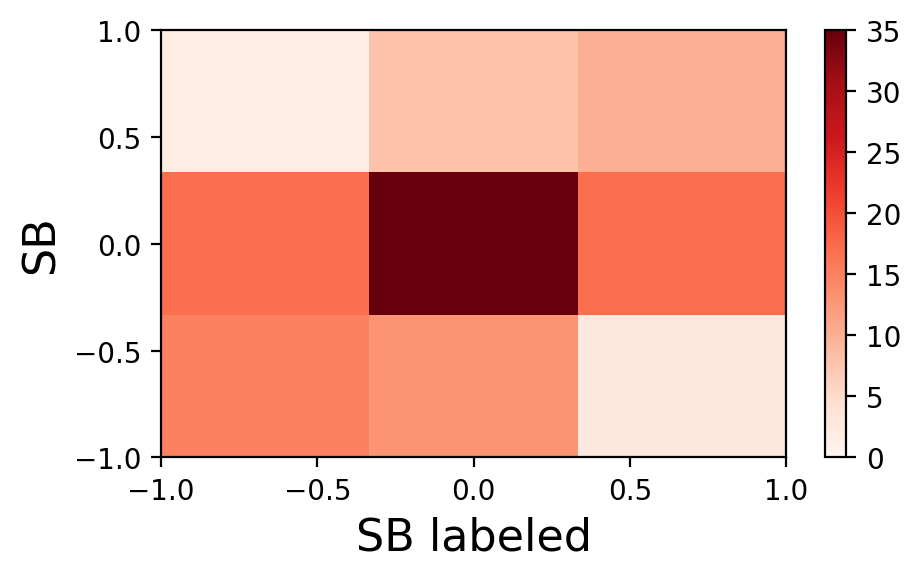

In [17]:
plt.figure(dpi = 200, figsize = (5,3))
plt.hist2d(all_data['SB_labeled'], all_data['SB'], 
           bins = 3, range = [(-1, 1), (-1, 1)], vmin = 0,
           cmap = 'Reds')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel('SB labeled', size = 16)
plt.ylabel('SB', size = 16)
plt.colorbar()
plt.tight_layout()
plt.show()

### Relation between users

In [33]:
users_classification_cr = pd.DataFrame()
users_classification_cl = pd.DataFrame()

users_classification_cr['Seba'] = data1['Posicion CR']
users_classification_cr['Pablo'] = data2['Posicion CR']
#users_classification_cr['Sofi'] = data3['Posicion CR']

users_classification_cl['Seba'] = data1['Posicion CL']
users_classification_cl['Pablo'] = data2['Posicion CL']
#users_classification_cl['Sofi'] = data3['Posicion CL']

In [34]:
users_classification_cr.corr(method='spearman')

,Seba,Pablo
Seba,1.000000,0.646836
Pablo,0.646836,1.000000


In [35]:
users_classification_cl.corr(method='spearman')

,Seba,Pablo
Seba,1.000000,0.585982
Pablo,0.585982,1.000000


In [39]:
users_classification_cr.apply(lambda x: x[0] == x[1], axis = 1).sum()

89

In [40]:
users_classification_cl.apply(lambda x: x[0] == x[1], axis = 1).sum()

81